**결정 트리**

- SVM처럼 **결정 트리**는 분류와 회귀 작업 그리고 다중출력 작업도 가능한 다재다능한 머신러닝 알고리즘임
- 매우 복잡한 데이터셋도 학습할 수 있는 강력한 알고리즘임

# 결정 트리 학습과 시각화

결정 트리를 이해하기 위해 모델 하나를 만들어서 어떻게 예측하는지 살펴보겠음

In [8]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

# def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
#     path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
#     print("Saving figure", fig_id)
#     if tight_layout:
#         plt.tight_layout()
#     plt.savefig(path, format=fig_extension, dpi=resolution)

In [9]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # 꽃잎의 길이와 너비
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

- export_graphviz() 함수를 사용해 그래프 정의를 iris_tree.dot 파일로 출력하여 훈련된 결정 트리를 시각화할 수 있음

In [10]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

# Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

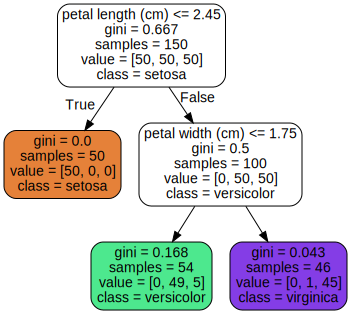

In [12]:
Source.from_file("images/decision_trees/iris_tree.dot")

- 이 .dot 파일을 Graphviz 패키지에 있는 dot 명령줄 도구로 PDF나 PNG 같은 포맷으로 변경함

# 예측하기

**루트 노드**(깊이가 0인 맨 꼭대기의 노드)에서 시작함
- 조건을 검사하고 True, False를 내어 왼쪽 혹은 오른쪽으로 이동함
- **리프 노드**(자식 노드를 가지지 않는 노드)에는 추가적인 검사를 하지 않음


- 노드의 sample 속성은 얼마나 많은 훈련 샘플이 적용되었는지 헤아린 것임
-